<a href="https://colab.research.google.com/github/abheendra/Online_shopper-s_intention/blob/main/Online_shopper's_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/Online ML - MS Aspirants - Sept 2020/Data/'
data = pd.read_csv(path + 'online_shoppers_intention.csv',)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.shape

(12330, 18)

In [ ]:
from sklearn.preprocessing import LabelEncoder

month_labelencoder = LabelEncoder()
data['Month'] = month_labelencoder.fit_transform(data['Month'])
visitortype_labelencoder = LabelEncoder()
data['VisitorType'] = visitortype_labelencoder.fit_transform(data['VisitorType'])
weekend_labelencoder = LabelEncoder()
data['Weekend'] = weekend_labelencoder.fit_transform(data['Weekend'])
revenue_labelencoder = LabelEncoder()
data['Revenue'] = revenue_labelencoder.fit_transform(data['Revenue'])
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


In [ ]:
xcol = data.drop(columns='Revenue')
ycol = data["Revenue"]

In [ ]:
x = np.array(xcol)
y = np.array(ycol)
y = np.reshape(y,(-1,1))
x.shape, y.shape

((12330, 17), (12330, 1))

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9247, 17), (3083, 17), (9247, 1), (3083, 1))

In [ ]:
import math
def eucledian_distance(point1, point2):
  sum_squared_distance = 0
  for i in range(len(point1)):
    sum_squared_distance += math.pow(point1[i] - point2[i],2)
  return math.sqrt(sum_squared_distance)

In [ ]:
from scipy import stats
import math

def knn(data, input_x, k, distance_fn):
  #create a list to store all predictions
  predictions = []

  #for loopto make predictions for every sample in test data
  for i in range(len(input_x)):
    #store all distances between input and training data
    neighbor_dist_and_indices = []

    for index,train in enumerate(data):
      #find the dist between new input with every sample in data
      distance = distance_fn(train[:], input_x[i])

      #store distance and index wrt training data
      neighbor_dist_and_indices.append((distance,index))

    #sort smallest to largest
    sorted_neighbor_dist_and_index = sorted(neighbor_dist_and_indices)

    #pick first k dist
    k_nearest_dist_and_indices = sorted_neighbor_dist_and_index[:k]

    #find y value for first k dist
    k_nearest_labels = [y_train[i][0] for distance,i in k_nearest_dist_and_indices]

    #find most common value of y
    prediction = (stats.mode(k_nearest_labels))

    predictions.append(prediction.mode[0])

  return predictions

In [ ]:
test = x_test[:1]
test_pred = knn(x_train, test, k=5, distance_fn = eucledian_distance)
print(test_pred)

[0]


In [ ]:
test = x_test
y_pred =  knn(x_train, test, k=5, distance_fn = eucledian_distance)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2590
           1       0.58      0.25      0.35       493

    accuracy                           0.85      3083
   macro avg       0.73      0.61      0.63      3083
weighted avg       0.83      0.85      0.83      3083



In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)*100

print('Accuracy = {}%'.format(round(accuracy,2)))

Accuracy = 85.14%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_neighbors =4)

model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
yt_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,yt_pred))

print(classification_report(y_test,yt_pred))

[[2541   49]
 [ 401   92]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2590
           1       0.65      0.19      0.29       493

    accuracy                           0.85      3083
   macro avg       0.76      0.58      0.60      3083
weighted avg       0.83      0.85      0.82      3083



In [ ]:
error = [] 
y_train = y_train.ravel()
for i in range(3,10):
  knn = KNeighborsClassifier(algorithm='brute', n_neighbors=i)
  knn.fit(x_train,y_train)

  pred_i = knn.predict(x_test)

  print(classification_report(y_test, pred_i))

  accuracy = accuracy_score(pred_i,y_test)*100
  error.append(100-accuracy)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2590
           1       0.54      0.30      0.39       493

    accuracy                           0.85      3083
   macro avg       0.71      0.63      0.65      3083
weighted avg       0.82      0.85      0.83      3083

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2590
           1       0.65      0.19      0.29       493

    accuracy                           0.85      3083
   macro avg       0.76      0.58      0.60      3083
weighted avg       0.83      0.85      0.82      3083

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2590
           1       0.58      0.25      0.35       493

    accuracy                           0.85      3083
   macro avg       0.73      0.61      0.63      3083
weighted avg       0.83      0.85      0.83      3083

              preci

In [ ]:
print(error)

[15.212455400583849, 14.59617255919558, 14.855660071359068, 14.790788193318193, 15.180019461563404, 14.888096010379499, 15.212455400583849]


Text(0, 0.5, 'Error')

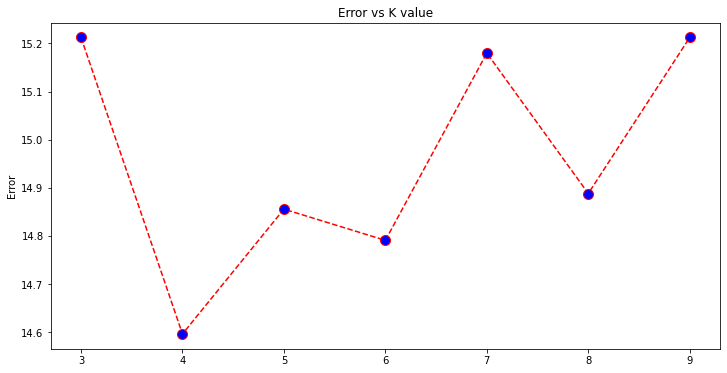

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(range(3,10), error, color ='red', linestyle = 'dashed',marker ='o',markerfacecolor = 'blue', markersize = 10)
plt.title("Error vs K value")
plt.xlabel:('K value')
plt.ylabel('Error')

In [ ]:
from imblearn.over_sampling import SMOTENC

oversampling = SMOTENC(categorical_features = [0,2,4,10,11,12,13,14,15,16])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
y = np.ravel(y)

r_x,r_y = oversampling.fit_resample(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
r_x.shape,r_y.shape

((20844, 17), (20844,))

In [ ]:
from sklearn.model_selection import train_test_split

rx_train, rx_test, ry_train,ry_test = train_test_split(r_x,r_y, test_size = 0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 4)
model.fit(rx_train, ry_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
ry_pred= model.predict(rx_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ry_test, ry_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2595
           1       0.85      0.85      0.85      2616

    accuracy                           0.85      5211
   macro avg       0.85      0.85      0.85      5211
weighted avg       0.85      0.85      0.85      5211

